In [23]:
import requests
from html.parser import HTMLParser

In [24]:
url = 'https://es.wikipedia.org/wiki/Ciencia_de_datos'

In [25]:
text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-available" lang="es" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Ciencia de datos - Wikipedia, la enciclopedia libre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-fea

In [26]:
class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Ciencia de datos - Wikipedia, la enciclopedia libre Ir al contenido Menú principal Menú principal mover a la barra lateral ocultar 
		Navegación
	 Portada Portal de la comunidad Actualidad Cambios recientes Páginas nuevas Página aleatoria Ayuda Donaciones Notificar un error Idiomas Los enlaces de idiomas se encuentran en la parte superior de la página, frente al título. Buscar Buscar Crear una cuenta Acceder Herramientas personales Crear una cuenta Acceder 
		Páginas para editores desconectados  más información Contribuciones Discusión Contenidos mover a la barra lateral ocultar Inicio 1 Historia 2 Formación 3 Aplicaciones Alternar subsección Aplicaciones 3.1 Marketing 3.2 Gobernanza 4 Ciencia de datos y  Big data 5 Científico de datos Alternar subsección Científico de datos 5.1 La importancia de un científico de datos 6 Referencias Cambiar a la tabla de contenidos Ciencia de datos 46 idiomas العربية Azərbaycanca Български বাংলা Català Čeština Deutsch Ελληνικά English Esperanto Eesti 

In [27]:
import sys
!{sys.executable} -m pip install nlp_rake


[notice] A new release of pip is available: 23.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('primera vez', 4.0),
 ('big data', 4.0),
 ('políticas públicas', 4.0),
 ('data scientist', 4.0),
 ('data science', 3.857142857142857),
 ('ciencias', 1.625),
 ('aplicaciones', 1.4),
 ('estadística', 1.375),
 ('extraer', 1.25),
 ('analizar', 1.25),
 ('disciplina', 1.25),
 ('estadísticos', 1.25),
 ('lograr', 1.25),
 ('parte', 1.25),
 ('davenport', 1.25),
 ('almacenamiento', 1.25),
 ('wikipedia', 1.2),
 ('computación', 1.2),
 ('bases', 1.2),
 ('datos', 1.1981132075471699),
 ('conocimiento', 1.1666666666666667),
 ('científicos', 1.1428571428571428),
 ('ciencia', 1.096774193548387),
 ('inglés', 1.0714285714285714),
 ('información', 1.0588235294117647),
 ('científico', 1.0),
 ('análisis', 1.0),
 ('algoritmos', 1.0),
 ('investigación', 1.0),
 ('implementación', 1.0),
 ('resultados', 1.0),
 ('editar', 1.0),
 ('artículo', 1.0),
 ('estadístico', 1.0),
 ('campo', 1.0),
 ('abril', 1.0),
 ('enero', 1.0),
 ('septiembre', 1.0),
 ('usuarios', 1.0),
 ('ayuda', 1.0),
 ('diseño', 1.0),
 ('privacidad', 1

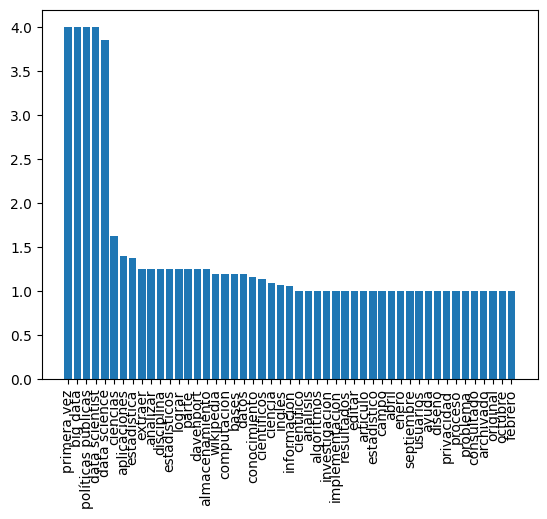

In [29]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

In [30]:
!{sys.executable} -m pip install wordcloud


[notice] A new release of pip is available: 23.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


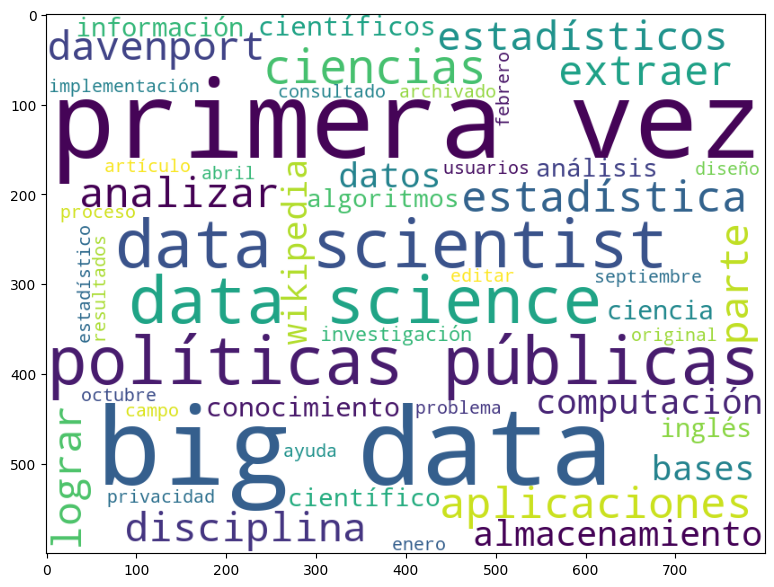

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

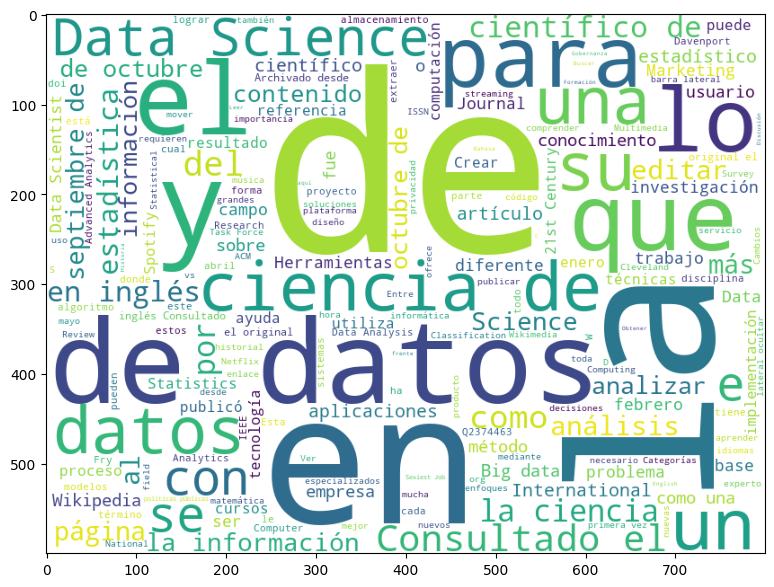

In [36]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [33]:
wc.generate(text).to_file('./nube_palabras_ciencia_datos.png')